# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question
#### Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

# Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

# Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. 
For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:
- Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
- Ad Views: The number of times the ad was viewed.
- Ad Clicks: The number of clicks received on the ad.
- Ad Conversions: The number of conversions resulting from the ad.
- Cost per Ad: The cost associated with running the Facebook ad campaign.
- Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per Click (CPC): The average cost incurred per click on the ad.

In [3]:
df = pd.read_csv("data/marketing_campaign.csv")
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
df.shape

(365, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

for col in df.select_dtypes(include="object").drop(columns=["Facebook Ad Campaign", "AdWords Ad Campaign"]).columns:
    df[col] = df[col].str.replace("$", "", regex=False).str.replace("%", "", regex=False).astype(float)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    float64       
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,194.0,1.18,8.40,3.30
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,75.0,1.77,7.80,1.05
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,141.0,1.13,9.59,3.23
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,141.0,1.26,11.08,2.86
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,133.0,1.36,12.22,2.40


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,365,2019-07-02 00:00:00,2019-01-01 00:00:00,2019-04-02 00:00:00,2019-07-02 00:00:00,2019-10-01 00:00:00,2019-12-31 00:00:00,NaN
Facebook Ad Views,365.0,2179.687671,1050.0,1656.0,2202.0,2717.0,3320.0,618.074639
Facebook Ad Clicks,365.0,44.049315,15.0,35.0,43.0,54.0,73.0,12.140559
Facebook Ad Conversions,365.0,11.742466,5.0,10.0,12.0,13.0,19.0,2.924786
Cost per Facebook Ad,365.0,87.780822,34.0,63.0,88.0,111.0,144.0,28.263014
Facebook Click-Through Rate (Clicks / View),365.0,2.201288,0.83,1.49,2.0,2.67,5.37,0.933193
Facebook Conversion Rate (Conversions / Clicks),365.0,27.153288,21.48,23.8,26.77,28.97,47.59,4.165921
Facebook Cost per Click (Ad Cost / Clicks),365.0,2.187808,0.61,1.41,2.02,2.76,7.14,1.04082
AdWords Ad Views,365.0,4717.19726,3714.0,4247.0,4711.0,5190.0,5760.0,561.11406
AdWords Ad Clicks,365.0,60.383562,31.0,49.0,60.0,73.0,89.0,14.368225


# Comparing Campaigns performance

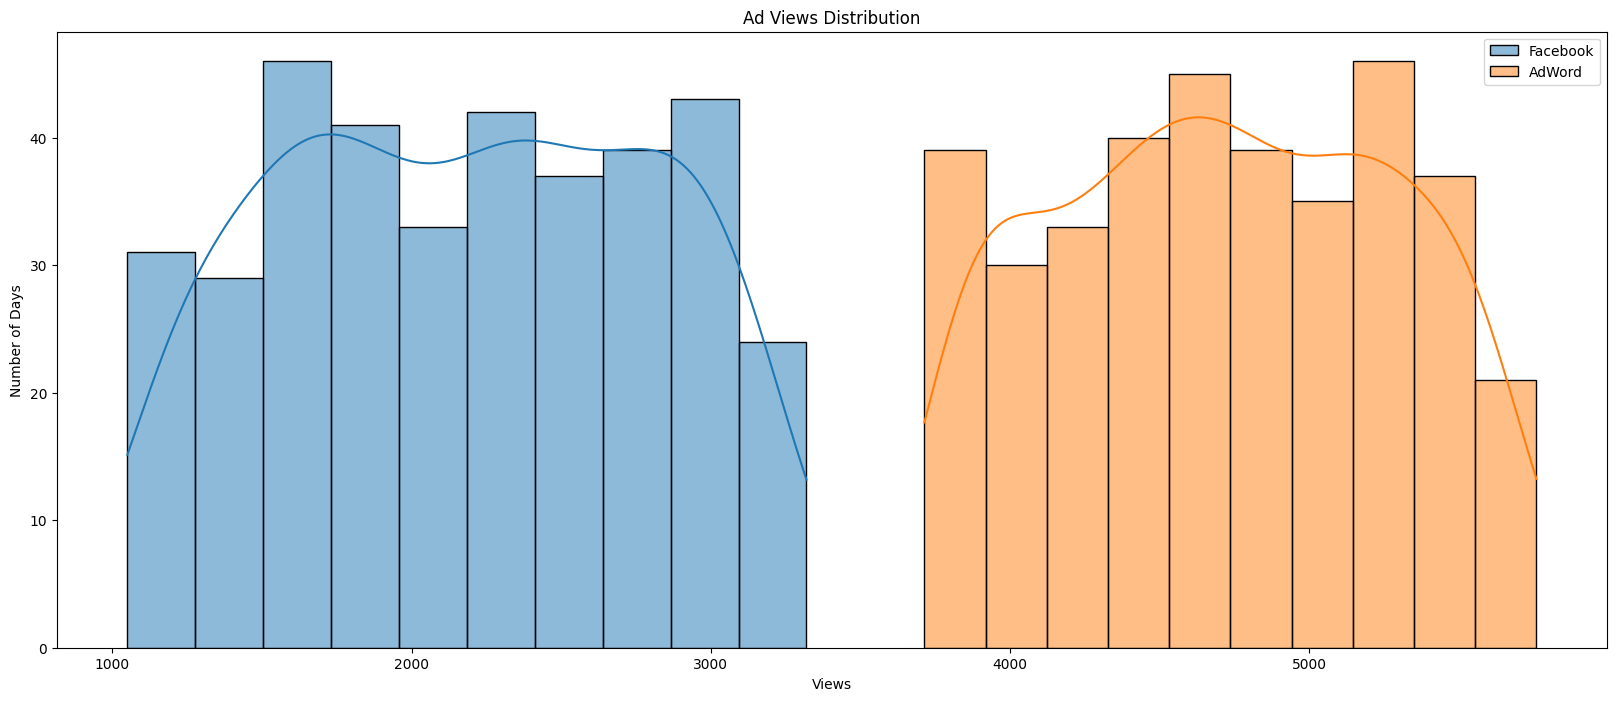

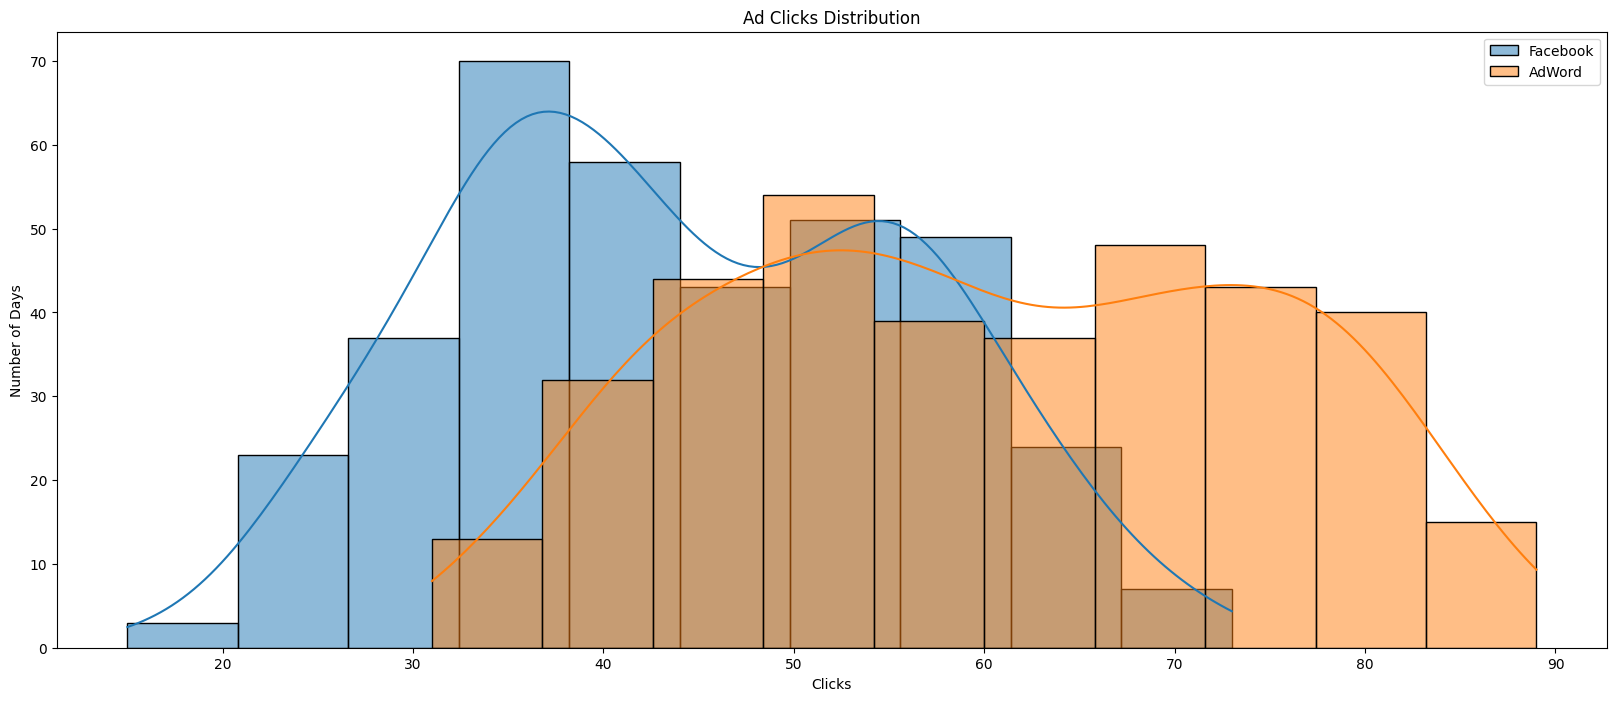

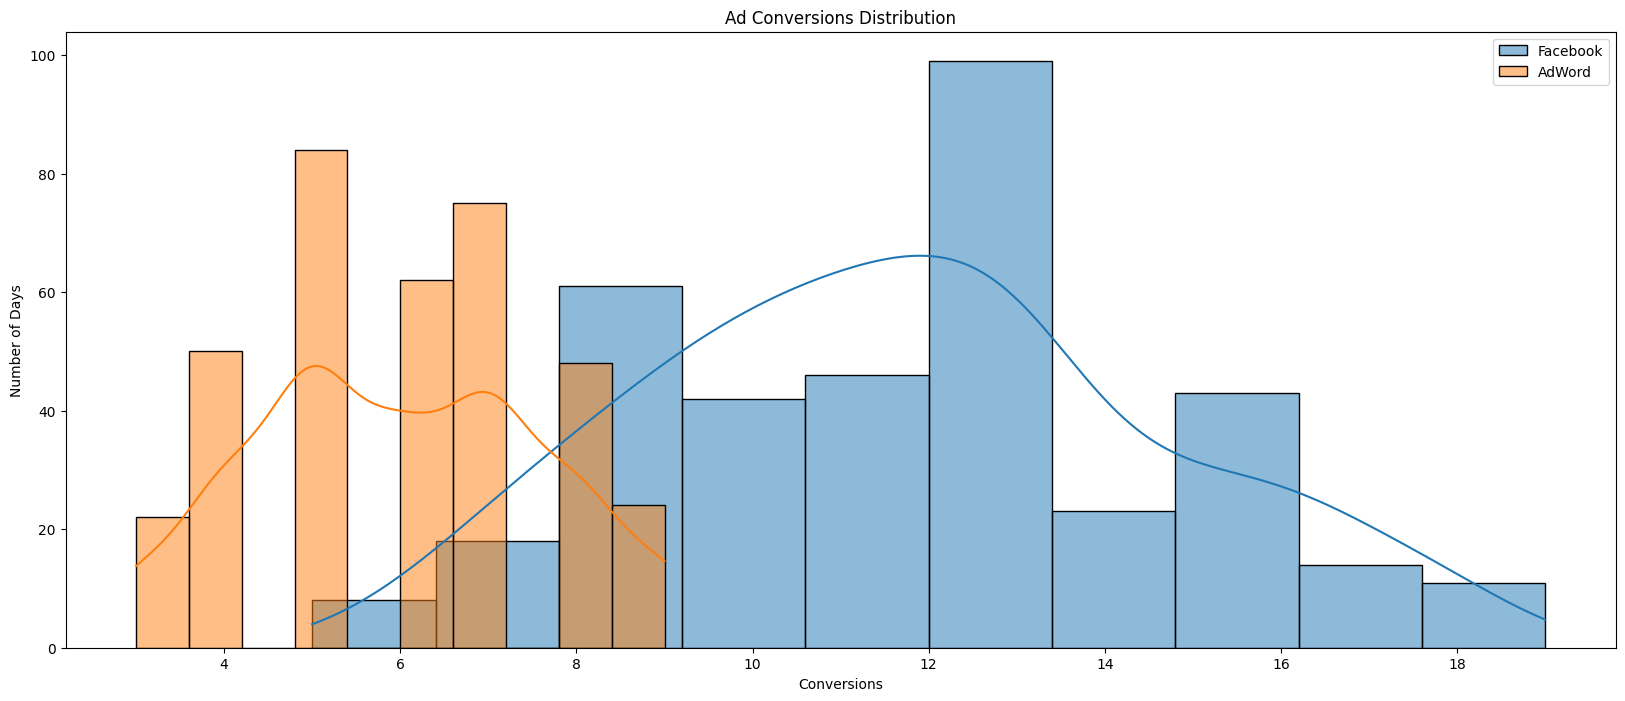

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(x="Facebook Ad Views", data=df, bins=10, kde=True, label="Facebook", ax=ax)
sns.histplot(x="AdWords Ad Views", data=df, bins=10, kde=True, label="AdWord", ax=ax)
ax.set_title("Ad Views Distribution")
ax.set_xlabel("Views")
ax.set_ylabel("Number of Days")
ax.legend()


fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(x="Facebook Ad Clicks", data=df, bins=10, kde=True, label="Facebook", ax=ax)
sns.histplot(x="AdWords Ad Clicks", data=df, bins=10, kde=True, label="AdWord", ax=ax)
ax.set_title("Ad Clicks Distribution")
ax.set_xlabel("Clicks")
ax.set_ylabel("Number of Days")
ax.legend()



fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(x="Facebook Ad Conversions", data=df, bins=10, kde=True, label="Facebook", ax=ax)
sns.histplot(x="AdWords Ad Conversions", data=df, bins=10, kde=True, label="AdWord", ax=ax)
ax.set_title("Ad Conversions Distribution")
ax.set_xlabel("Conversions")
ax.set_ylabel("Number of Days")
ax.legend()


All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.


#### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?


In [9]:
bins = [0,5,10,15,100]
labels = ["less than 6", "6-10", "11-15", "more than 15"]
df["Facebook Conversion Category"] = pd.cut(df["Facebook Ad Conversions"], bins=bins, labels=labels)
df["AdWords Conversion Category"] = pd.cut(df["AdWords Ad Conversions"], bins=bins, labels=labels)

In [10]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()


,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6-10,5,less than 6
1,12,11-15,6,6-10
2,8,6-10,4,less than 6
3,9,6-10,5,less than 6
4,7,6-10,7,6-10


In [11]:
Fb_category = df["Facebook Conversion Category"].value_counts().reset_index().rename(columns={
    "Facebook Conversion Category": "category",
    "count":"fb_count"
})

In [12]:
Aw_category = df["AdWords Conversion Category"].value_counts().reset_index().rename(columns={
    "AdWords Conversion Category": "category",
    "count":"aw_count"
})

In [13]:
df_conversion = pd.merge(left=Fb_category, right=Aw_category, on="category", how="outer")

In [14]:
df_conversion

,category,fb_count,aw_count
0,less than 6,1,156
1,6-10,128,209
2,11-15,189,0
3,more than 15,47,0


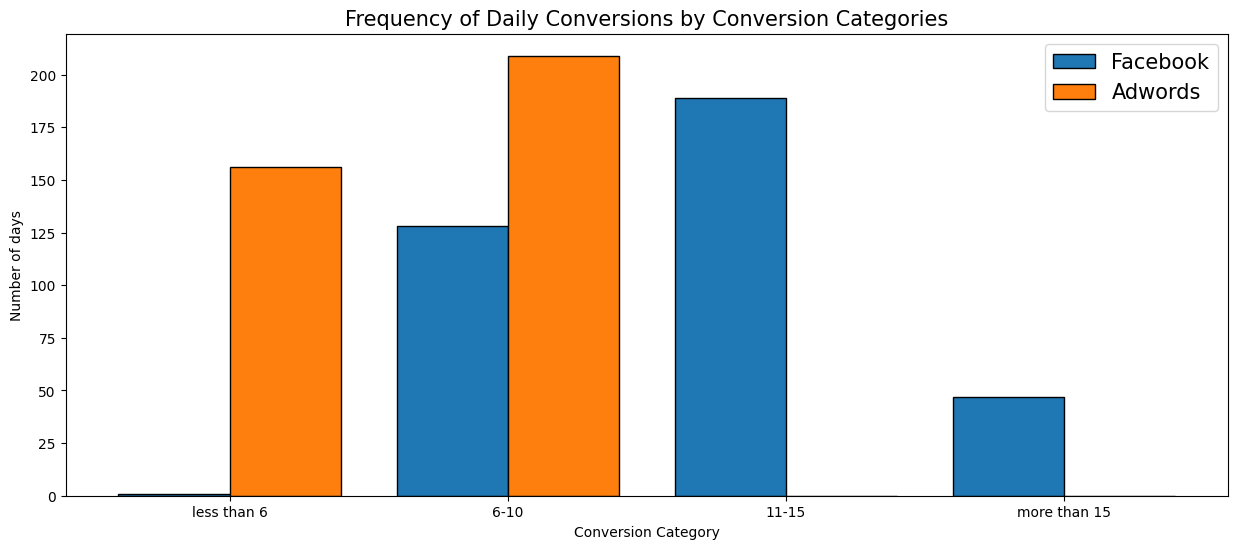

In [15]:
X_axis = np.arange(len(df_conversion)) 

X_axis = np.arange(len(df_conversion)) 
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, df_conversion['fb_count'], 0.4, label = 'Facebook', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, df_conversion['aw_count'], 0.4, label = 'Adwords', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, df_conversion['category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
- There is a significant difference in the number of high-conversion days between two different campaigns.
- The absence of any days with conversions between 11 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on the ad really lead to more sales?

In [16]:
df.columns

Index(['Date', 'Facebook Ad Campaign', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)',
       'Facebook Conversion Category', 'AdWords Conversion Category'],
      dtype='object')

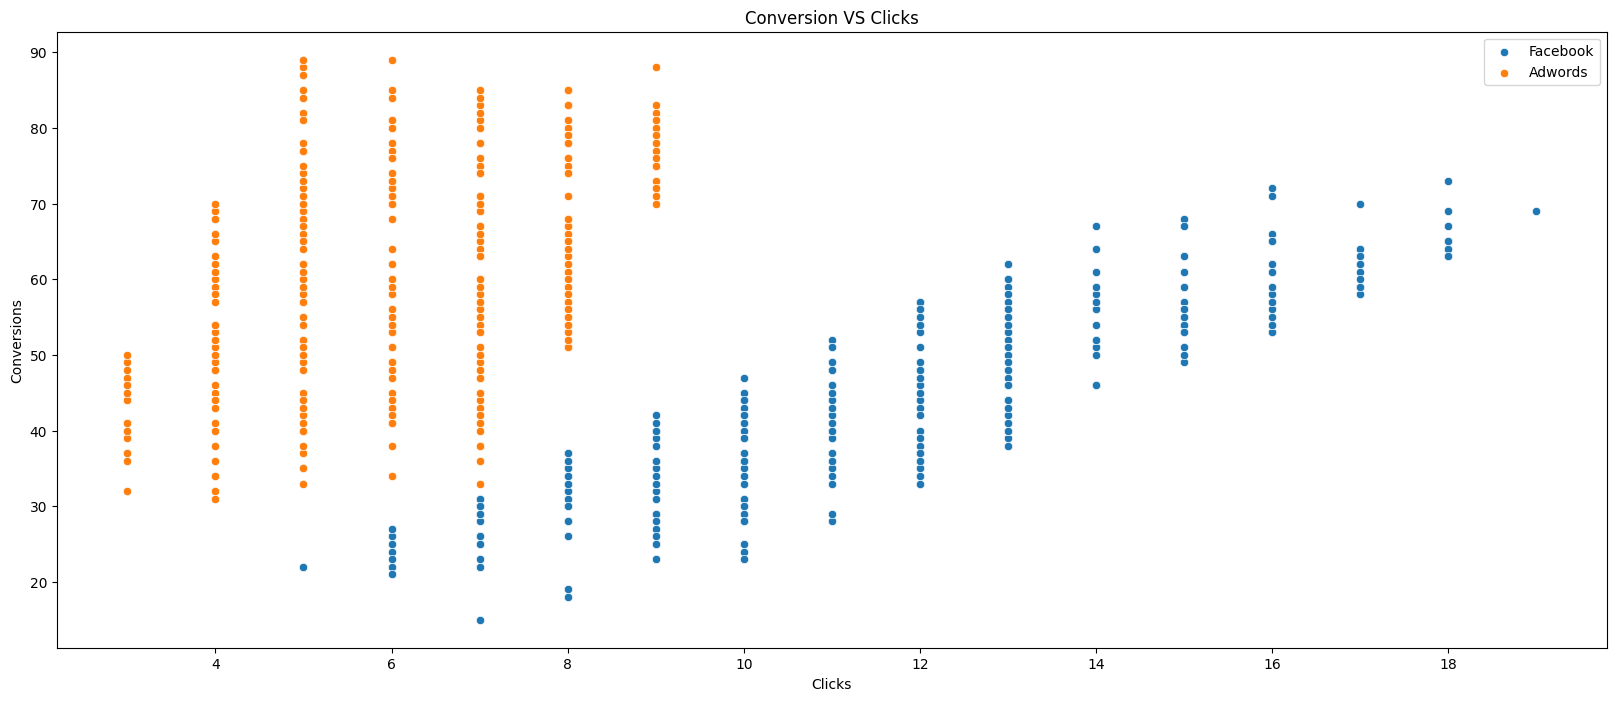

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x="Facebook Ad Conversions", y="Facebook Ad Clicks", data=df, label="Facebook", ax=ax)
sns.scatterplot(x="AdWords Ad Conversions", y="AdWords Ad Clicks", data=df, label="Adwords", ax=ax)
ax.set_title("Conversion VS Clicks")
ax.set_xlabel("Clicks")
ax.set_ylabel("Conversions")
ax.legend()

In [18]:
df_click_conv_corr = pd.DataFrame(
    {
        "Correlation": [
            df["Facebook Ad Clicks"].corr(df["Facebook Ad Conversions"]),
            df["AdWords Ad Clicks"].corr(df["AdWords Ad Conversions"])
        ]
    },
    index=["Facebook", "AdWords"]
)
df_click_conv_corr

,Correlation
Facebook,0.873775
AdWords,0.447993


- A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, the sales tend increase as well.
- This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
- The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
- A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.
- The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [19]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


- The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.
- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.
- The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.
- The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
- Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

# Regression Analysis

#### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [20]:
X = df[["Facebook Ad Clicks"]]
y = df["Facebook Ad Conversions"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nTraining Results")
print("R2 Score: ", round(r2_train * 100, 2))
print("MSE: ", round(mse_train, 2))
print("-" *50)

print("\nTest Results")
print("R2 Score: ", round(r2_test * 100, 2))
print("MSE: ", round(mse_test, 2))


Training Results
R2 Score:  75.96
MSE:  1.98
--------------------------------------------------

Test Results
R2 Score:  77.52
MSE:  2.19


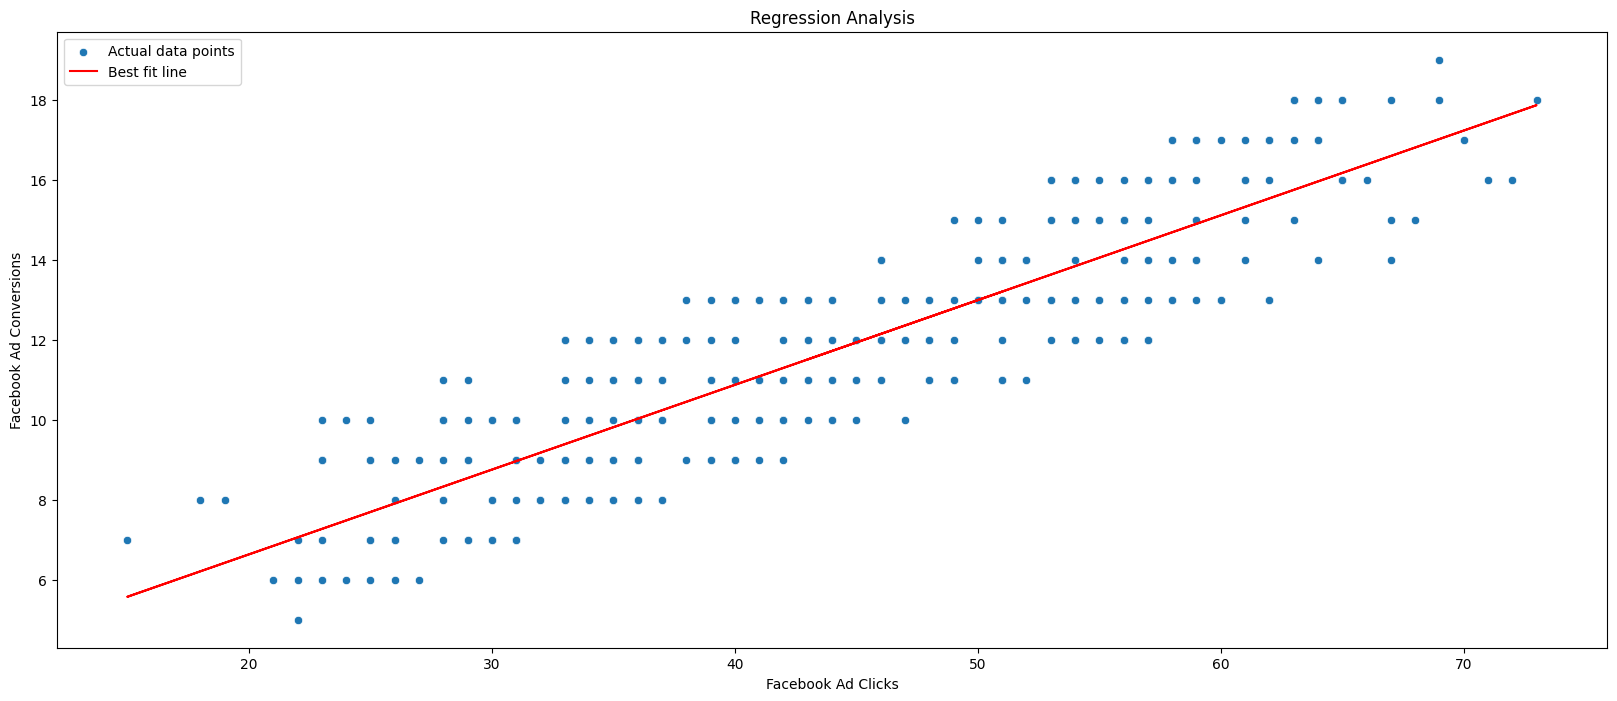

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x="Facebook Ad Clicks", y="Facebook Ad Conversions", data=df, label="Actual data points", ax=ax)
plt.plot(X_train, y_train_pred, color="red", label="Best fit line")
ax.set_title("Regression Analysis")
ax.legend(loc="upper left")

In [25]:
print(f"For {50} click, expected conversions: ", round(model.predict([[50]])[0], 2))
print(f"For {80} click, expected conversions: ", round(model.predict([[80]])[0], 2))

For 50 click, expected conversions:  12.99
For 80 click, expected conversions:  19.35


- The model has a reasonably good predictive power, with an R2 score of 77.52%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.
- With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

# Analyzing Facebook Campaign metrics over time.

In [26]:
fb_columns = df.columns[df.columns.str.contains("Facebook")].to_list()
fb_columns.append("Date")
fb_columns

['Facebook Ad Campaign',
 'Facebook Ad Views',
 'Facebook Ad Clicks',
 'Facebook Ad Conversions',
 'Cost per Facebook Ad',
 'Facebook Click-Through Rate (Clicks / View)',
 'Facebook Conversion Rate (Conversions / Clicks)',
 'Facebook Cost per Click (Ad Cost / Clicks)',
 'Facebook Conversion Category',
 'Date']

In [27]:
df_fb = df[fb_columns]
df_fb.head()

,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,Date
0,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,6-10,2019-01-01
1,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,11-15,2019-01-02
2,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,6-10,2019-01-03
3,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,6-10,2019-01-04
4,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,6-10,2019-01-05


#### At what times of the month or days of the week do we observe the conversions?

In [28]:
df_fb["month"] = df_fb["Date"].dt.month
df_fb["weekday"] = df_fb["Date"].dt.weekday

Text(0, 0.5, 'Conversion Count')

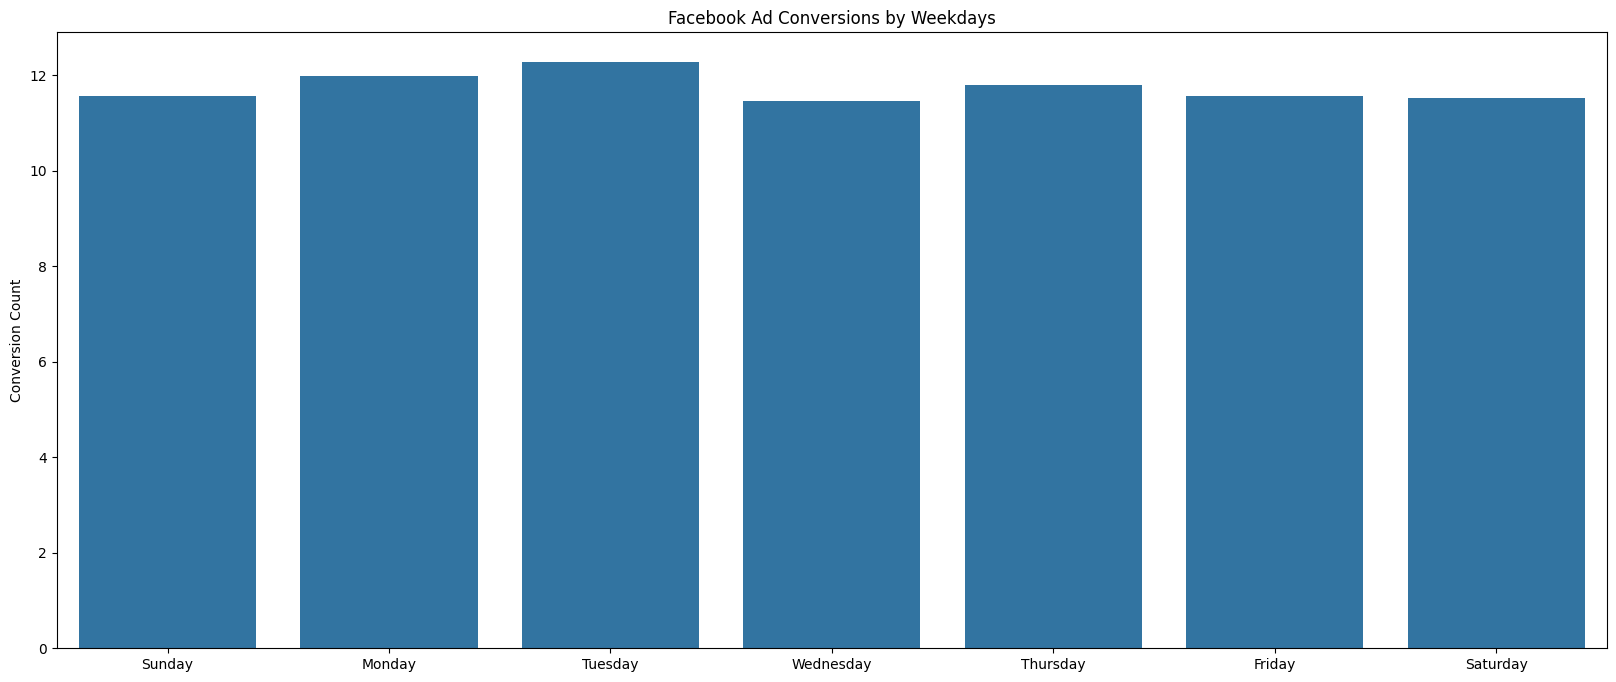

In [33]:
series_weekday = df_fb.groupby("weekday")["Facebook Ad Conversions"].mean()
weekday = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x=weekday, y=series_weekday, ax=ax)
ax.set_title("Facebook Ad Conversions by Weekdays")
ax.set_ylabel("Conversion Count")

Text(0, 0.5, 'Conversion Count')

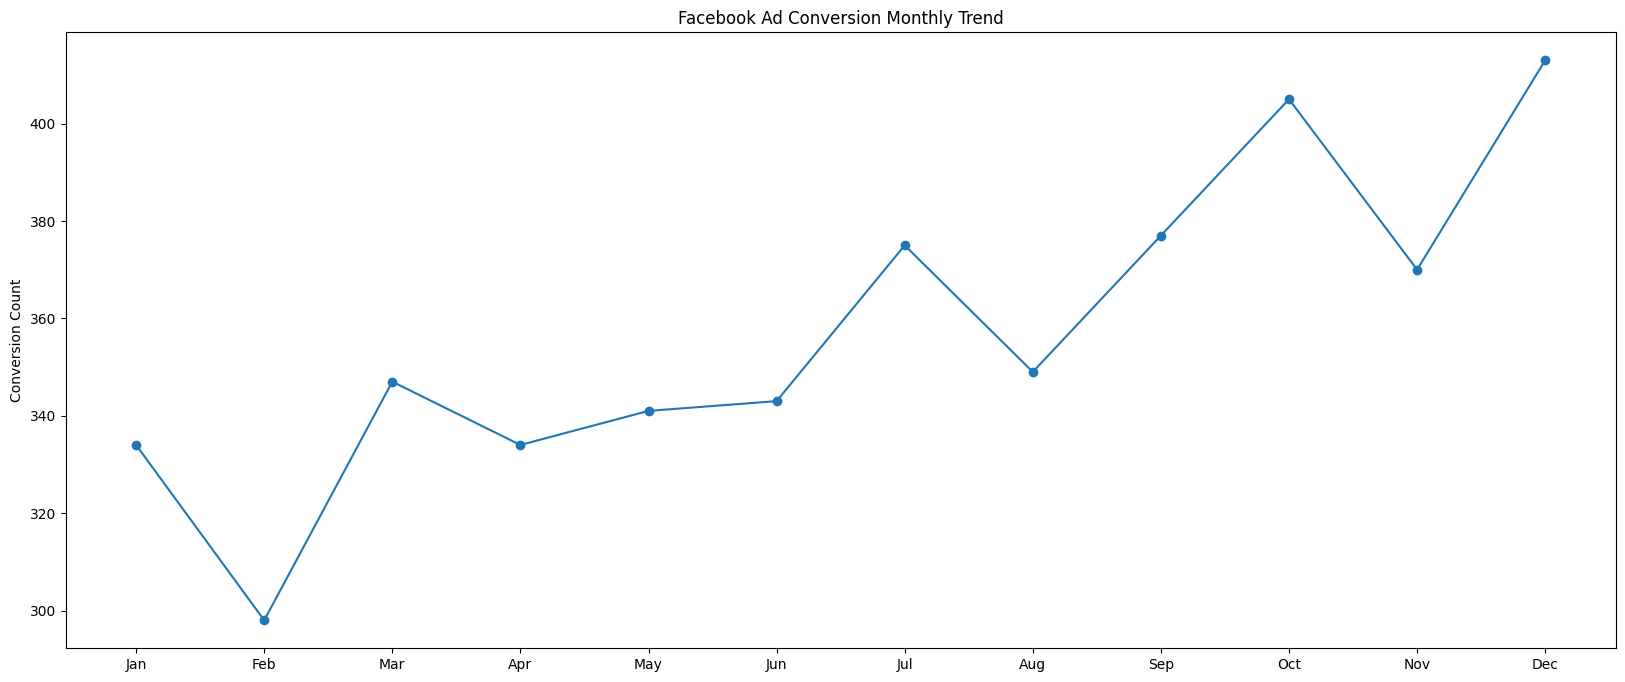

In [39]:
series_month = df_fb.groupby("month")["Facebook Ad Conversions"].sum()
month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(month, series_month, marker="o")
ax.set_title("Facebook Ad Conversion Monthly Trend")
ax.set_ylabel("Conversion Count")


- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

#### How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

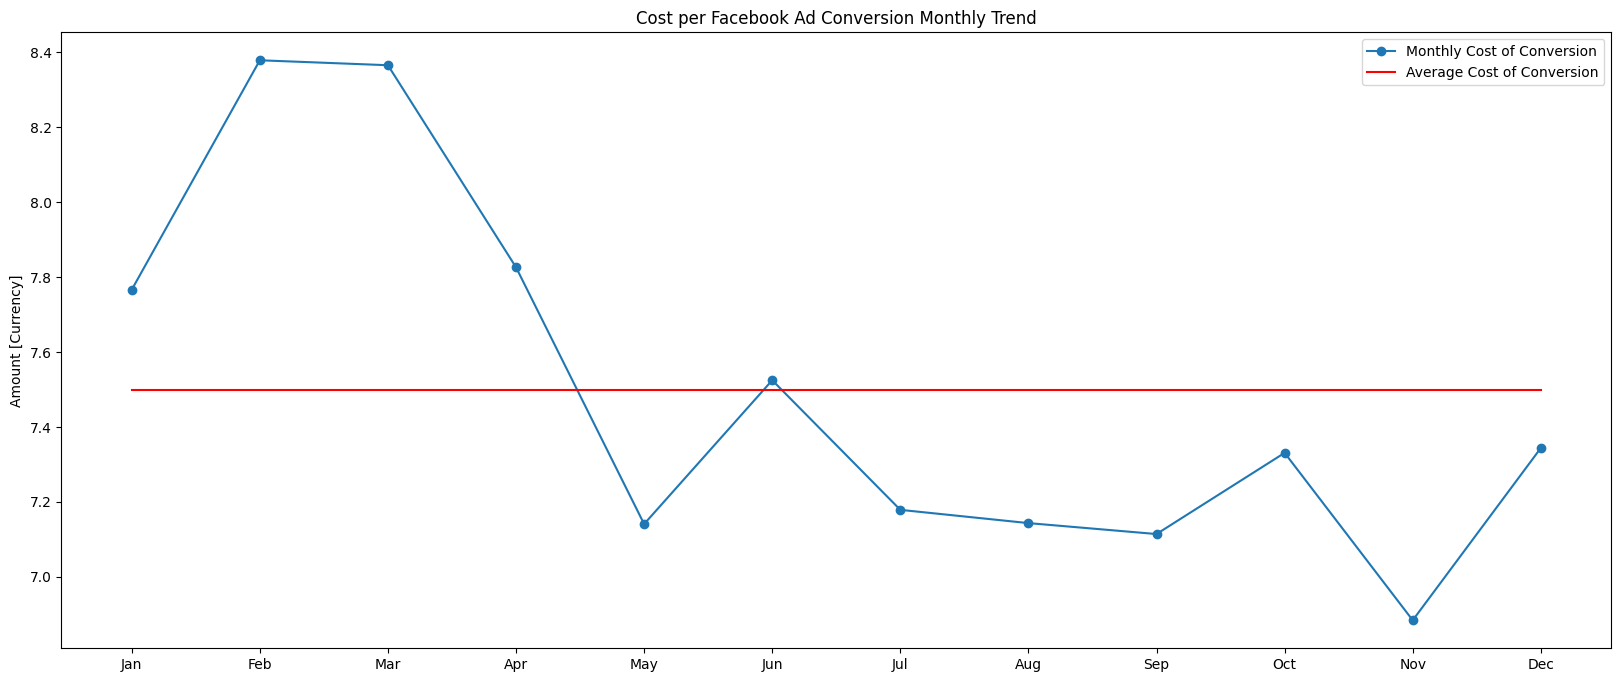

In [50]:
df_month_cpc = df_fb.groupby("month")[["Facebook Ad Conversions", "Cost per Facebook Ad"]].sum()
df_month_cpc["Cost per Facebook Ad Conversion"] = df_month_cpc["Cost per Facebook Ad"] / df_month_cpc["Facebook Ad Conversions"]
mean = df_month_cpc["Cost per Facebook Ad Conversion"].mean()
mean = [mean] * 12

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(month, df_month_cpc["Cost per Facebook Ad Conversion"], marker="o", label="Monthly Cost of Conversion")
ax.plot(month, mean, color="red", label="Average Cost of Conversion")
ax.set_title("Cost per Facebook Ad Conversion Monthly Trend")
ax.set_ylabel("Amount [Currency]")
ax.legend(loc="upper right")

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
- May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
- February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
- Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [52]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

- Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.